In [ ]:
!pip install pandas matplotlib statsmodels openpyxl




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving walmart Retail Data.xlsx to walmart Retail Data.xlsx


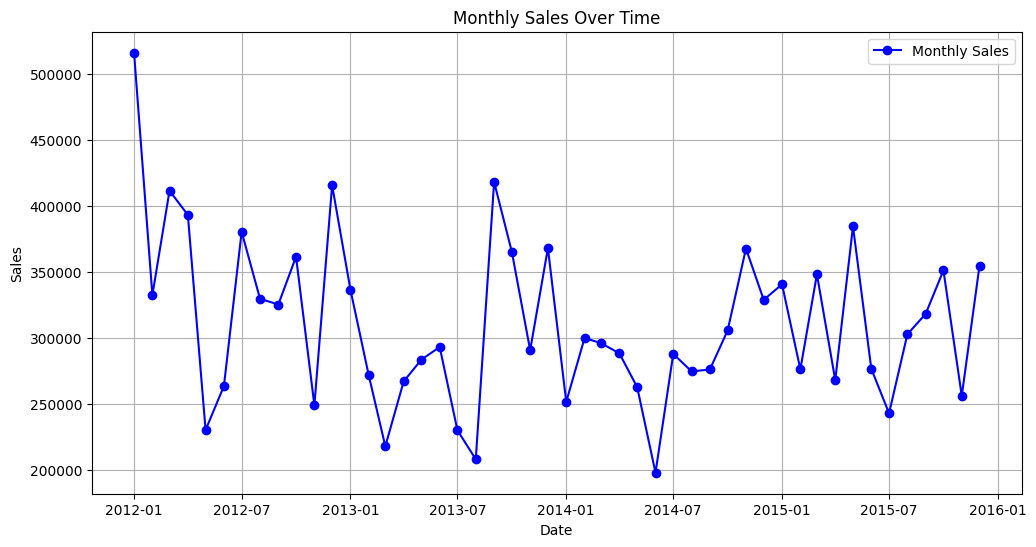

ADF Statistic: -7.051210351232603
p-value: 5.520440777337416e-10
The time series is stationary.
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -582.564
Date:                Fri, 03 Jan 2025   AIC                           1171.127
Time:                        13:32:31   BIC                           1176.678
Sample:                    01-01-2012   HQIC                          1173.216
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0981      0.155      0.632      0.528      -0.206       0.403
ma.L1         -0.9918      0.299   

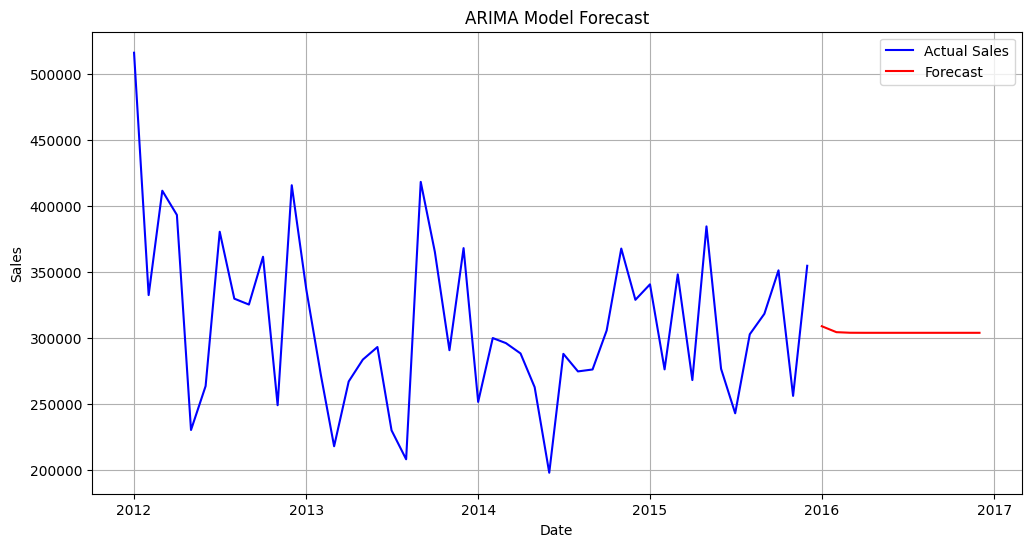

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the uploaded file
file_path = 'walmart Retail Data.xlsx'  # Adjust to your uploaded file's name
df = pd.read_excel(file_path, sheet_name='walmart Retail Data')

# Parse dates and aggregate sales by month
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().to_timestamp()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', color='blue', label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

# Check for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(monthly_sales)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

# Differencing if needed
if result[1] >= 0.05:
    monthly_sales_diff = monthly_sales.diff().dropna()

# ARIMA Model
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast_steps = 12  # Predict 12 months ahead
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1),
                               periods=forecast_steps, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Actual Sales', color='blue')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()
